Load the data from the load notebook.


%run "cog_wfdb-dataframe-to-cache.ipynb"

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


import pandas as pd
import numpy as np
cache = 'cached_eq_ml_data.hdf'
samples = pd.read_hdf(cache, 'cached_data')

Ensure tflearn and tensorflow is installed

!pip3 install tflearn tensorflow

Remove columns that aren't needed.

isolate_millivolt_features....


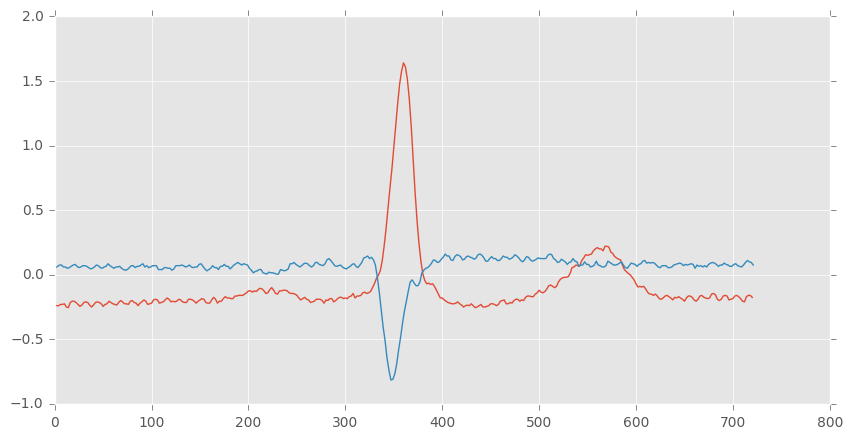

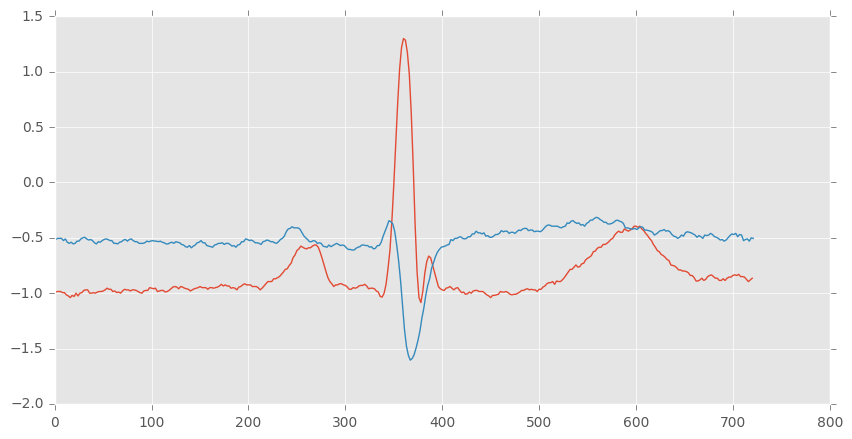

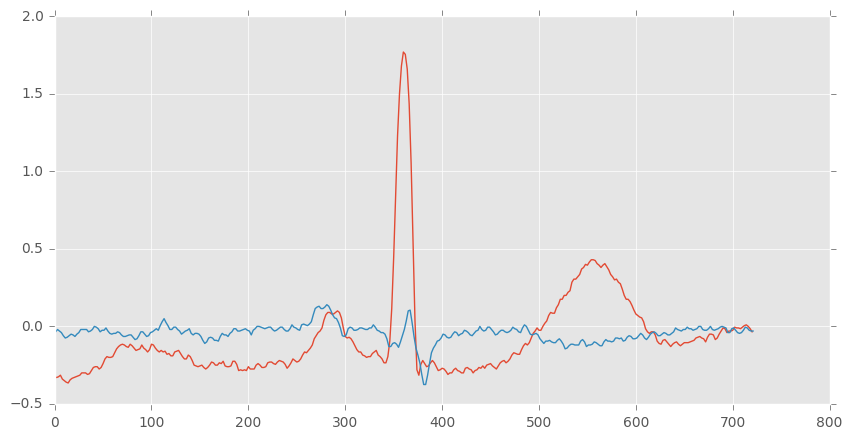

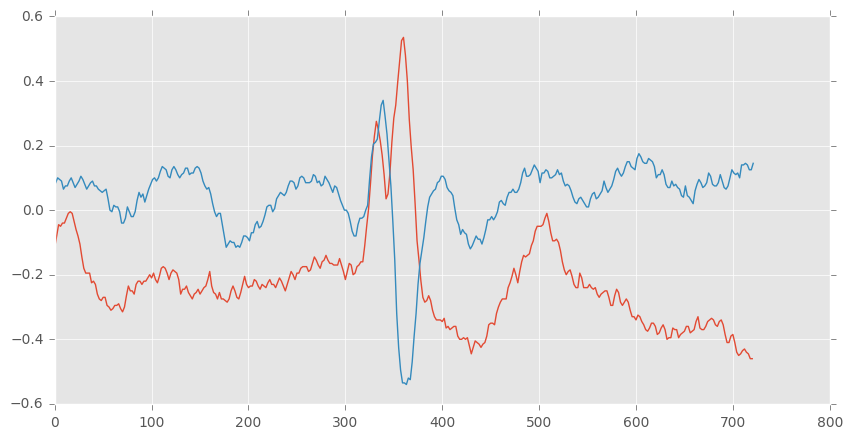

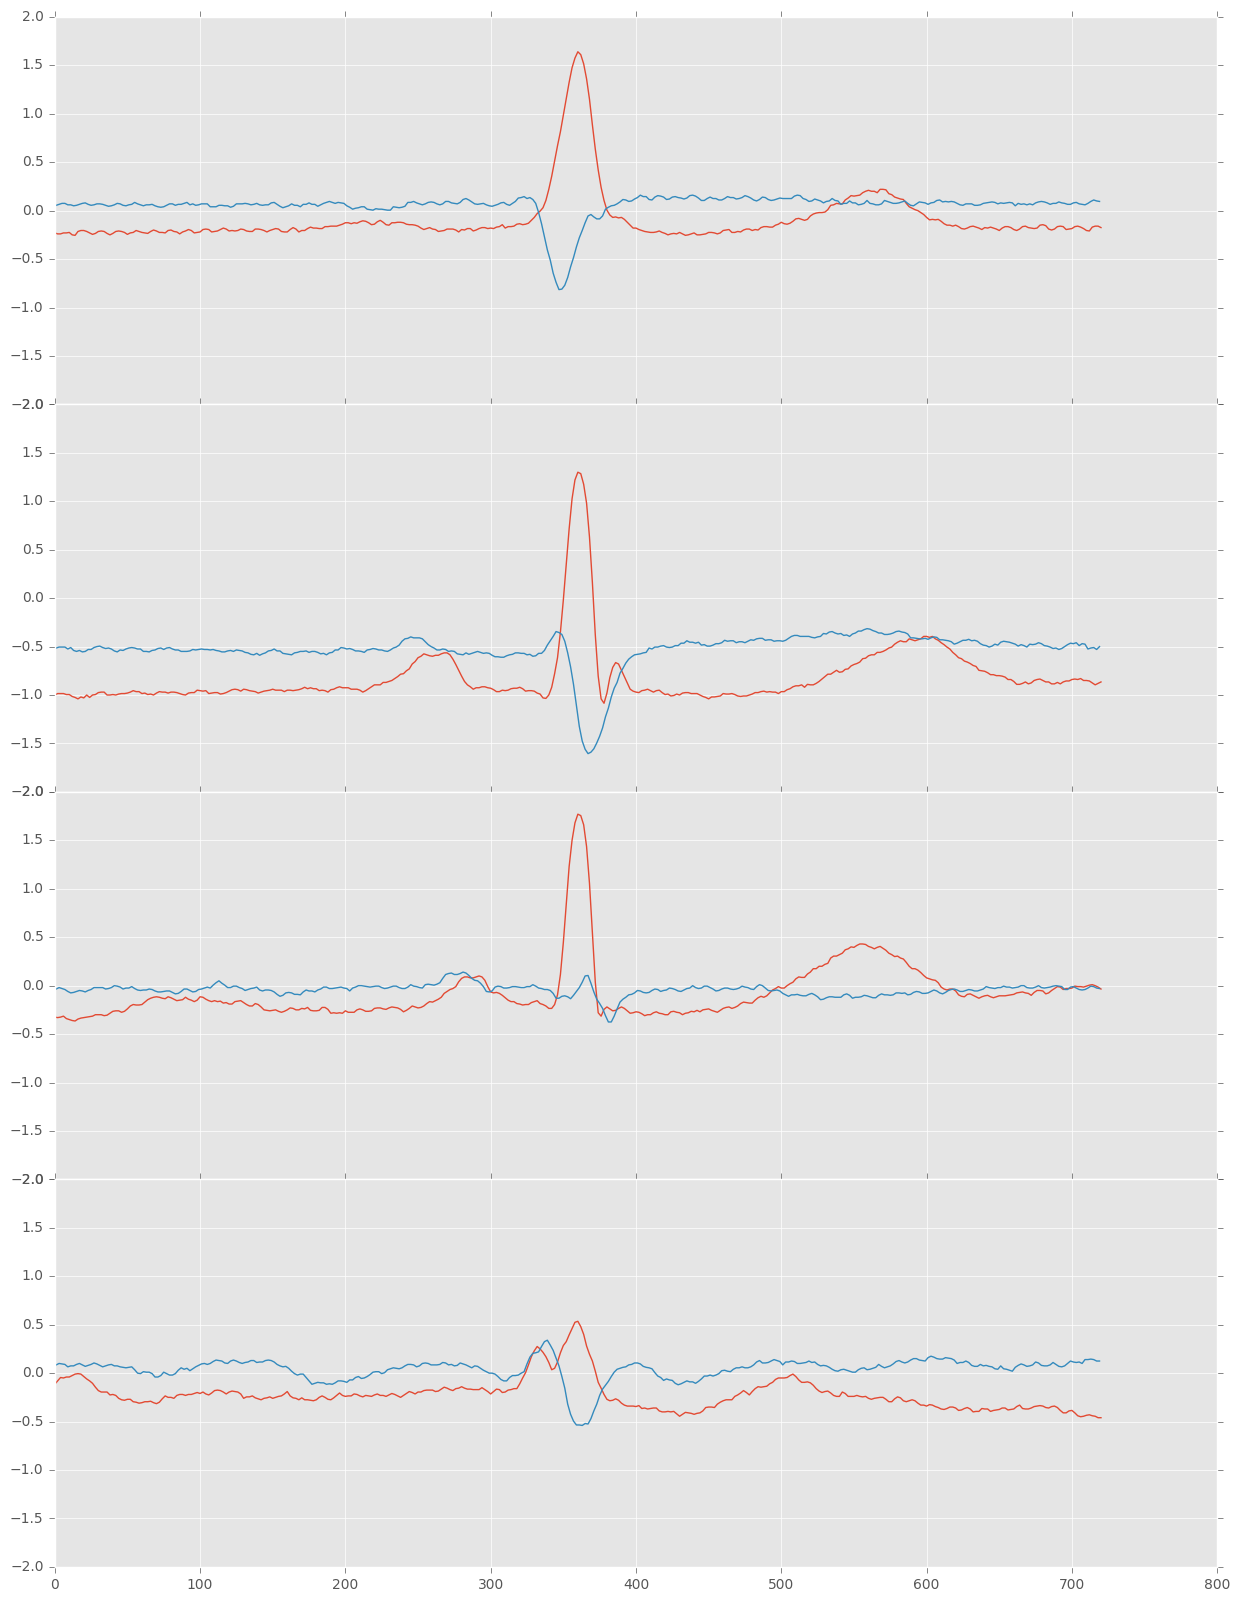

In [2]:
def isolate_millivolt_features(anEcgDataFrame):
    # trim data down
    data = anEcgDataFrame
    import re;
    columns = data.drop('labels', axis=1).columns.tolist()
    columns = list(filter(lambda x: not re.search('_max|_var', str(x)), columns))

    samples = data[columns]
    samples = samples.fillna(0)

    labels = data['labels']

    return samples, labels, columns



print('isolate_millivolt_features....')
from IPython.display import display
#display(samples)
milivoltFeatures, labels, columns = isolate_millivolt_features(samples)


def plotter(row):
    plt.figure(figsize=(10, 5))
    plt.plot(row[0::2])
    plt.plot(row[1::2])
    plt.show()
#print(milivoltFeatures.iloc[:,:])

milivoltFeatures.iloc[:4,:].apply(lambda x: plotter(x), axis=1 ) 

f, axs = plt.subplots(4, sharex=True, sharey=True,figsize=(15, 20))
for rowIdx in range( len(axs) ):
    axs[rowIdx].plot( samples.iloc[rowIdx,0:721:2] )
    axs[rowIdx].plot( samples.iloc[rowIdx,1:721:2] )
f.subplots_adjust(hspace=0)

Dataset Mean

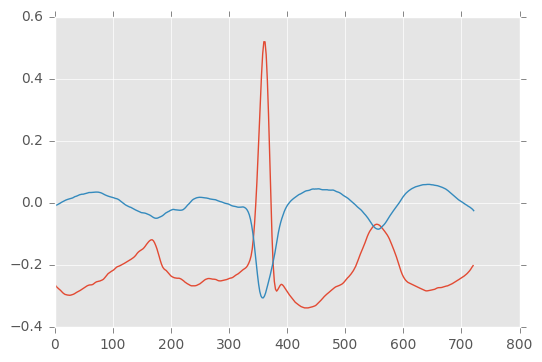

In [3]:
mean_row = np.mean(milivoltFeatures, axis=0)
plt.plot(mean_row[0::2])
plt.plot(mean_row[1::2])
plt.show()

Dataset Standard Deviation

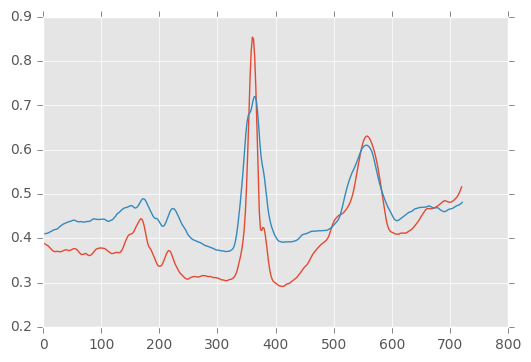

In [4]:
std_row = np.std(milivoltFeatures, axis=0)
plt.plot(std_row[0::2])
plt.plot(std_row[1::2])
plt.show()

In [5]:
def draw_confusion_matrices(confusion_matricies,class_names):
    import matplotlib.pyplot as plt
    class_names = class_names.tolist()
    for cm in confusion_matricies:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    

Show tensorflow graph

In [6]:
from IPython.display import clear_output, Image, display, HTML
import tensorflow as tf

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

Process ECG data

In [7]:
from sklearn.cross_validation import train_test_split
x_train, x_val, y_train, y_val = \
    train_test_split(milivoltFeatures.values, labels.values, test_size=0.20,
                     random_state=np.random.randint(0, 100))

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


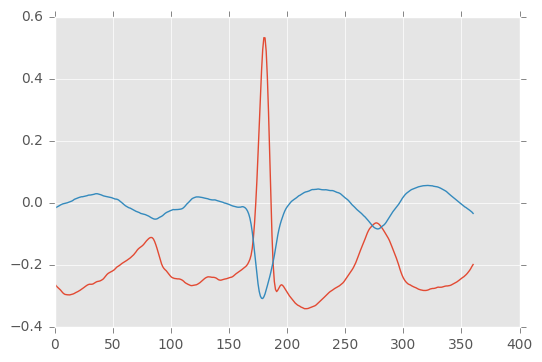

In [8]:
mean_row = np.mean(x_train, axis=0)
plt.plot(mean_row[0::2])
plt.plot(mean_row[1::2])
plt.show()

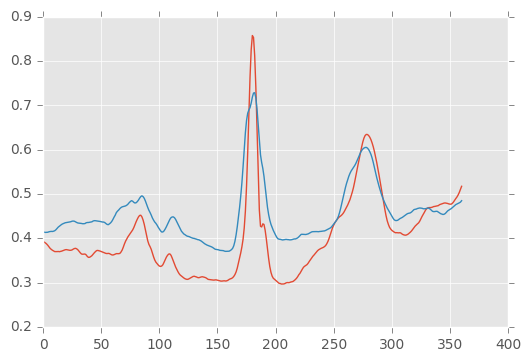

In [9]:
std_row = np.std(x_train, axis=0)
plt.plot(std_row[0::2])
plt.plot(std_row[1::2])
plt.show()

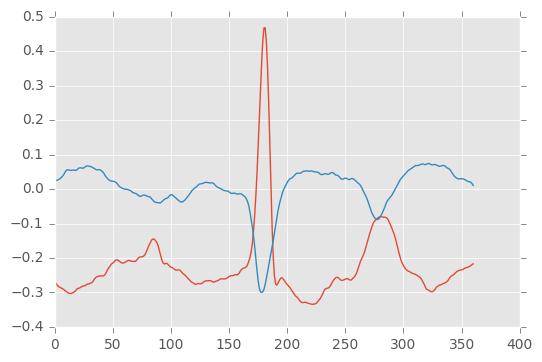

In [10]:
mean_row = np.mean(x_val, axis=0)
plt.plot(mean_row[0::2])
plt.plot(mean_row[1::2])
plt.show()

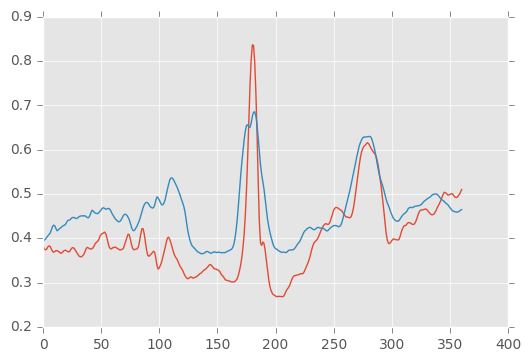

In [11]:
std_row = np.std(x_val, axis=0)
plt.plot(std_row[0::2])
plt.plot(std_row[1::2])
plt.show()

---------------------------------
Run id: ECG DNN
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 1452
Validation samples: 364
--
Training Step: 1  | time: 1.256s
| Adam | epoch: 001 | loss: 0.00000 - acc: 0.0000 | val_loss: 0.69262 - val_acc: 0.4835 -- iter: 1452/1452
--
Training Step: 2  | total loss: 0.67988 | time: 1.087s
| Adam | epoch: 002 | loss: 0.67988 - acc: 0.4852 | val_loss: 0.68776 - val_acc: 0.6181 -- iter: 1452/1452
--
Training Step: 3  | total loss: 0.67988 | time: 1.047s
| Adam | epoch: 003 | loss: 0.67988 - acc: 0.4852 | val_loss: 0.67397 - val_acc: 0.7637 -- iter: 1452/1452
--
Training Step: 4  | total loss: 0.68519 | time: 1.067s
| Adam | epoch: 004 | loss: 0.68519 - acc: 0.5903 | val_loss: 0.64723 - val_acc: 0.8159 -- iter: 1452/1452
--
Training Step: 5  | total loss: 0.67638 | time: 1.053s
| Adam | epoch: 005 | loss: 0.67638 - acc: 0.7385 |

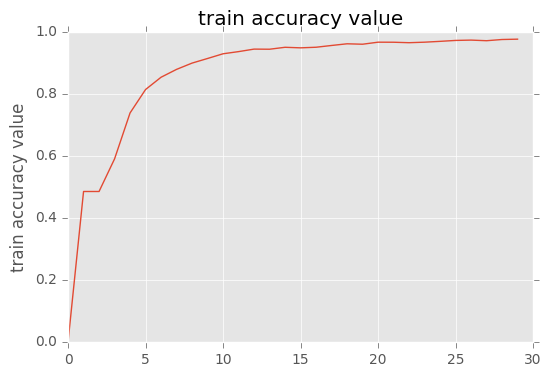

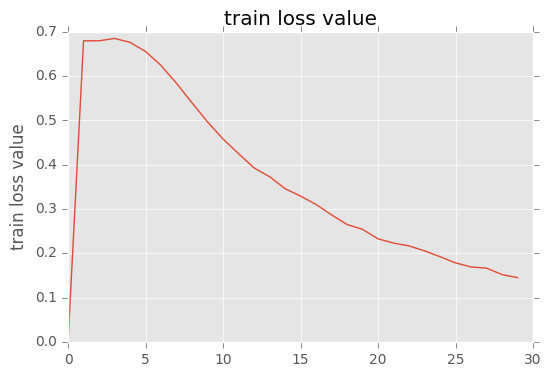

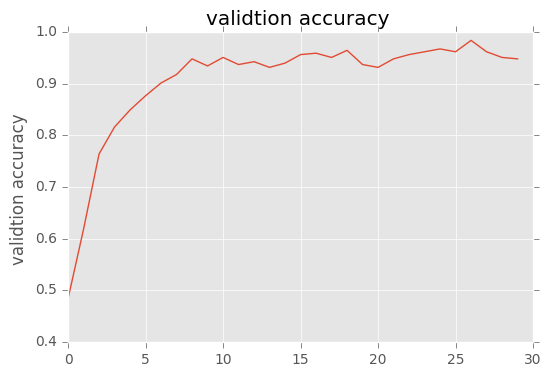

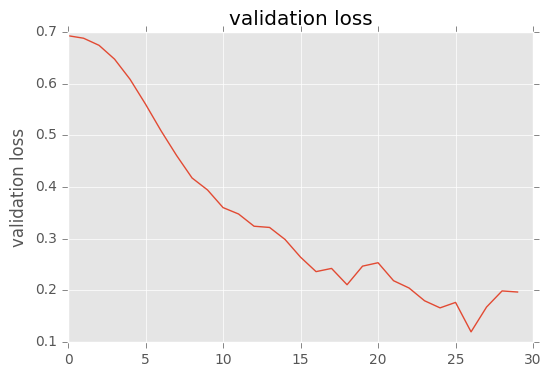

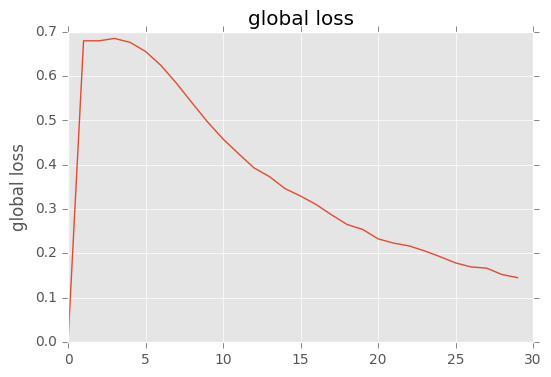

Train Accuracy: 0.973829
Validation Accuracy: 0.947802


In [12]:

# convert into 2 columns, isGood, isBad
from tflearn.data_utils import to_categorical
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)

'''
        x_train 	: x training data
        y_train 	: y training labels
        x_val 		: x validation data
        y_val 		: y validation labels
'''

import tflearn
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    # define neural net
    net = tflearn.input_data(shape=[None, x_train.shape[1]])
    net = tflearn.fully_connected(net, 50, activation='relu', name='relu_0')
    net = tflearn.fully_connected(net, 200, activation='relu', name='relu_1')
    net = tflearn.fully_connected(net, 10, activation='tanh', name='tanh')
    net = tflearn.fully_connected(net, 2, activation='softmax', name='softmax');
    net = tflearn.regression(net, learning_rate=0.005)
    show_graph(graph_to_use.as_graph_def())        

    import libs.nb_utils as nb_utils;
    nb_utils.show_graph(graph_to_use.as_graph_def())    

    # define model
    model = tflearn.DNN(net, tensorboard_verbose=3)

    class History(tflearn.callbacks.Callback):
        def on_train_begin(self, training_state):
            #self.losses = []
            self.acc_value =  []
            self.loss_value =  []

            self.val_acc =  []
            self.val_loss =  []

            self.global_acc =  []
            self.global_loss =  []

        def on_epoch_end(self, training_state):
            #self.losses.append(training_state.global_loss)

            self.acc_value.append(training_state.acc_value)
            self.loss_value.append(training_state.loss_value)

            self.val_acc.append(training_state.val_acc)
            self.val_loss.append(training_state.val_loss)

            self.global_acc.append(training_state.global_acc)
            self.global_loss.append(training_state.global_loss)

    # train
    history = History()
    model.fit(x_train, y_train, show_metric=True, batch_size=x_train.shape[0], n_epoch=30,run_id='ECG DNN',callbacks=[history],
          validation_set=(x_val,y_val), validation_batch_size=x_val.shape[0] )

    def plot(name,value): 
        #print(value)
        plt.plot(value)
        plt.title(name)
        plt.ylabel('epoch')
        plt.ylabel(name)
        plt.show()

    plot('train accuracy value',history.acc_value)
    plot('train loss value',history.loss_value)
    plot('validtion accuracy ',history.val_acc)
    plot('validation loss',history.val_loss)
    #plot('global acc',history.global_acc)
    plot('global loss',history.global_loss)

    # print accuracy statistics
    result = model.evaluate(x_train, y_train, batch_size=x_train.shape[0])
    accuracy_score = result[0]
    print("Train Accuracy: %f" % accuracy_score)

    result = model.evaluate(x_val, y_val, batch_size=x_val.shape[0])
    accuracy_score = result[0]
    print("Validation Accuracy: %f" % accuracy_score)



In [13]:
Show confusion matrix in text and graph

SyntaxError: invalid syntax (<ipython-input-13-615097cdaa5c>, line 1)

In [ ]:

with graph_to_use.as_default():
    # print detail statistics
    import sklearn.metrics as skmetric
    from sklearn.metrics import classification_report

    print("----- validation")
    pred = model.predict(x_val)
    pred = np.around(np.asarray(pred))
    print("classification")
    print(classification_report(np.asarray(y_val.argmax(axis=1)), np.asarray(pred.argmax(axis=1))))
    print("confusion matrix")
    cm_val = skmetric.confusion_matrix(np.asarray(y_val.argmax(axis=1)), np.asarray(pred.argmax(axis=1)))

    print("----- training")
    pred = model.predict(x_train)
    pred = np.around(np.asarray(pred))
    print("classification")
    print(classification_report(y_train.argmax(axis=1), pred.argmax(axis=1)))
    print("confusion matrix")
    cm_train = (skmetric.confusion_matrix(np.asarray(y_train.argmax(axis=1)), np.asarray(pred.argmax(axis=1))))

    class_names = np.unique(y_train)
    confusion_matrices = [
    ( "DNN val", cm_val ),
    ( "DNN train", cm_train),
    ]
    %matplotlib inline
    draw_confusion_matrices(confusion_matrices,class_names)


In [ ]:
import webbrowser

# generate an URL
url = 'http://ubuntu:30000'
print(url)
webbrowser.open(url)

In [ ]:
%run /opt/conda/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py --logdir=/tmp/tflearn_logs/ --port 30000